In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv('3.01. Country clusters.csv')

In [7]:
data


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


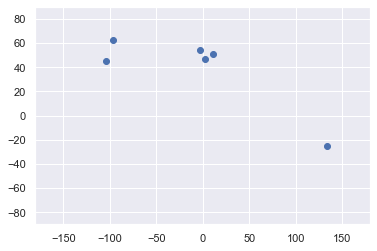

In [8]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [9]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [10]:
kmeans=KMeans(3)

In [11]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
identified_clusters=kmeans.fit_predict(x)

In [13]:
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [14]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


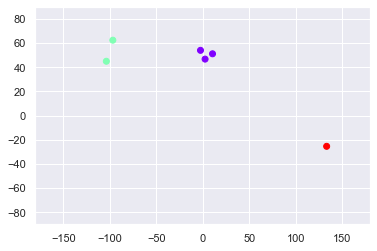

In [15]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### making use of language column

In [18]:
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [19]:
x=data_mapped.iloc[:,3:4]

In [20]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [36]:
kmeans=KMeans(3)

In [52]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
identified_clusters=kmeans.fit_predict(x)

In [55]:
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [40]:
data_with_clusters=data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


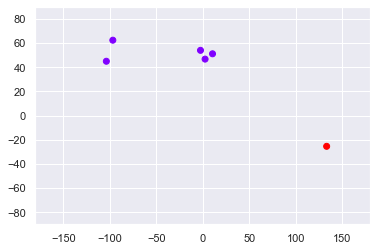

In [41]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [42]:
 x=data_mapped.iloc[:,1:4]

In [43]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [70]:
kmeans=KMeans(3)

In [71]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
identified_clusters=kmeans.fit_predict(x)

In [73]:
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [74]:
data_with_clusters=data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


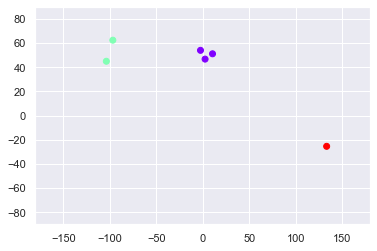

In [75]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### selecting the no. of clusters

### WCSS

In [62]:
kmeans.inertia_

13208.95812

In [66]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [67]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

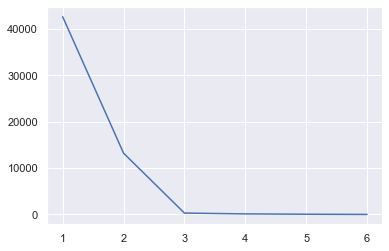

In [69]:
number_clusters=range(1,7)
plt.plot(number_clusters,wcss)

### hence the no of cluster is 3